In [1]:
import os
import warnings
import re

import math
import sympy
import scipy
import cobra
import csv
import numpy as np
import pandas as pd
from micom import Community
from cobra.io import read_sbml_model
from micom.media import minimal_medium
from cobra.flux_analysis import flux_variability_analysis

In [2]:
org_list_file = open('/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Models.csv')
org_names = [(i.split())[0] for i in org_list_file.readlines()]
org_names

['Acidaminococcus_fermentans_DSM_20731',
 'Akkermansia_muciniphila_ATCC_BAA_835',
 'Alistipes_finegoldii_DSM_17242',
 'Alistipes_putredinis_DSM_17216',
 'Alistipes_shahii_WAL_8301',
 'Bacteroides_caccae_ATCC_43185',
 'Bacteroides_coprocola_M16_DSM_17136',
 'Bacteroides_eggerthii_DSM_20697',
 'Bacteroides_fragilis_NCTC_9343',
 'Bacteroides_intestinalis_341_DSM_17393',
 'Bacteroides_stercoris_ATCC_43183',
 'Bacteroides_thetaiotaomicron_VPI_5482',
 'Bacteroides_uniformis_ATCC_8492',
 'Bifidobacterium_adolescentis_ATCC_15703',
 'Bifidobacterium_bifidum_PRL2010',
 'Bifidobacterium_longum_NCC2705',
 'Bilophila_wadsworthia_3_1_6',
 'Blautia_wexlerae_DSM_19850',
 'Citrobacter_amalonaticus_Y19',
 'Clostridium_clostridioforme_CM201',
 'Collinsella_tanakaei_YIT_12063',
 'Coprococcus_catus_GD_7',
 'Desulfovibrio_desulfuricans_subsp_desulfuricans_DSM_642',
 'Desulfovibrio_piger_ATCC_29098',
 'Dialister_invisus_DSM_15470',
 'Dorea_longicatena_DSM_13814',
 'Enterobacter_cloacae_EcWSU1',
 'Enterococcu

In [3]:
exchanges_pd = pd.DataFrame(index = org_names, columns = org_names)
exchanges_pd

,Acidaminococcus_fermentans_DSM_20731,Akkermansia_muciniphila_ATCC_BAA_835,Alistipes_finegoldii_DSM_17242,Alistipes_putredinis_DSM_17216,Alistipes_shahii_WAL_8301,Bacteroides_caccae_ATCC_43185,Bacteroides_coprocola_M16_DSM_17136,Bacteroides_eggerthii_DSM_20697,Bacteroides_fragilis_NCTC_9343,Bacteroides_intestinalis_341_DSM_17393,...,Pseudoflavonifractor_capillosus_strain_ATCC_29799,Roseburia_intestinalis_L1_82,Roseburia_inulinivorans_DSM_16841,Ruminococcus_bromii_L2_63,Ruminococcus_callidus_ATCC_2776001,Ruminococcus_torques_ATCC_27756,Shigella_flexneri_2002017,Streptococcus_salivarius_JIM8777,Subdoligranulum_variabile_DSM_15176,Veillonella_atypica_ACS_049_V_Sch6
Acidaminococcus_fermentans_DSM_20731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akkermansia_muciniphila_ATCC_BAA_835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_finegoldii_DSM_17242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_putredinis_DSM_17216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_shahii_WAL_8301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_caccae_ATCC_43185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_coprocola_M16_DSM_17136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_eggerthii_DSM_20697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_fragilis_NCTC_9343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_intestinalis_341_DSM_17393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
org_pairs = []
excs = []

In [ ]:
for i in range(len(org_names)):
    for j in range(i+1, len(org_names)):
        
        file_1 = '/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Models/' + org_names[i] + '.xml'
        file_2 = '/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Models/' + org_names[j] + '.xml'  

        model_1 = read_sbml_model(file_1)
        model_2 = read_sbml_model(file_2)

        table = {'id': ['model_1', 'model_2'], 'file':[file_1, file_2]}

        data = pd.DataFrame(table)      
        taxonomy = data 
        com = Community(taxonomy, progress = False)

        com.medium = minimal_medium(com, 1, min_growth = 0.1)

        sol_fva = flux_variability_analysis(com, reaction_list = com.internal_exchanges, fraction_of_optimum = 0.7)

        exchanges_list = []
        for rxn in sol_fva.index:
            if sol_fva.loc[rxn]['maximum'] <= -1*(10**-3) or sol_fva.loc[rxn]['minimum'] >= (10**-3):
                exchanges_list.append(rxn)
                
        exchanges_distinct = []
        for rxn in exchanges_list:
            rxn_strip = rxn.split('__')[0]
            if rxn_strip not in exchanges_distinct:
                exchanges_distinct.append(rxn_strip)
                
        print(org_names[i], org_names[j])
        print(exchanges_distinct)
        
        org_pairs.append([org_names[i], org_names[j]])
        excs.append(exchanges_distinct)
        
        exchanges_pd[org_names[i]][org_names[j]] = len(exchanges_distinct)


Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpyt1ot6j4.lp
Reading time = 0.01 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpinkbjdm4.lp
Reading time = 0.01 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpgja85xo6.lp
Reading time = 0.01 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmplm83cr27.lp
Reading time = 0.01 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpfg9mpsc5.lp
Reading time = 0.05 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpgmm5cb5a.lp
Reading time = 0.01 seconds
: 2461 rows, 5272 columns, 20279 nonzeros
Read LP fo

Process SpawnPoolWorker-3287:
Traceback (most recent call last):
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/site-packages/cobra/flux_analysis/variability.py", line 86, in _fva_step
    _model.solver.objective.set_linear_coefficients(
  File "/Users/ashnanarain/anaconda3/envs/cobraenv/lib/python3.11/site-packages/optlang/gu

Read LP format model from file /var/folders/dn/p3xbs4r94jqf_5q7_q53zj_c0000gn/T/tmpv4wjt__m.lp
Reading time = 0.03 seconds
: 4452 rows, 10456 columns, 34723 nonzeros

Interrupt request received

Interrupt request received

Interrupt request received


In [ ]:
exchanges_pd.to_csv('/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Data/Metabolic_Exchanges_Total_FINAL_with_min_Growths.csv')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
exchanges_pd = pd.read_csv('/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Data/Metabolic_Exchanges_Total_Sorted.csv', index_col  = 'Unnamed: 0')
exchanges_pd

,Bifidobacterium_adolescentis_ATCC_15703,Bifidobacterium_bifidum_PRL2010,Bifidobacterium_longum_NCC2705,Collinsella_tanakaei_YIT_12063,Alistipes_finegoldii_DSM_17242,Alistipes_putredinis_DSM_17216,Alistipes_shahii_WAL_8301,Bacteroides_caccae_ATCC_43185,Bacteroides_coprocola_M16_DSM_17136,Bacteroides_eggerthii_DSM_20697,...,Desulfovibrio_desulfuricans_subsp_desulfuricans_DSM_642,Desulfovibrio_piger_ATCC_29098,Enterobacter_cloacae_EcWSU1,Escherichia_coli_str_K_12_substr_MG1655,Haemophilus_parainfluenzae_T3T1,Helicobacter_pylori_26695,Klebsiella_pneumoniae_pneumoniae_MGH78578,Shigella_flexneri_2002017,Akkermansia_muciniphila_ATCC_BAA_835,Fusobacterium_varium_ATCC_27725
Bifidobacterium_adolescentis_ATCC_15703,NaN,NaN,NaN,NaN,29.0,33.0,30.0,35.0,31.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
Bifidobacterium_bifidum_PRL2010,20.0,NaN,NaN,NaN,24.0,51.0,23.0,21.0,23.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
Bifidobacterium_longum_NCC2705,28.0,17.0,NaN,NaN,24.0,50.0,25.0,22.0,22.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN
Collinsella_tanakaei_YIT_12063,36.0,36.0,33.0,NaN,41.0,53.0,42.0,39.0,36.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN
Alistipes_finegoldii_DSM_17242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN
Alistipes_putredinis_DSM_17216,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN
Alistipes_shahii_WAL_8301,NaN,NaN,NaN,NaN,32.0,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN
Bacteroides_caccae_ATCC_43185,NaN,NaN,NaN,NaN,22.0,21.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN
Bacteroides_coprocola_M16_DSM_17136,NaN,NaN,NaN,NaN,19.0,47.0,33.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
Bacteroides_eggerthii_DSM_20697,NaN,NaN,NaN,NaN,20.0,56.0,33.0,22.0,22.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN


In [4]:
exchanges_pd_1 = pd.read_csv('/Users/ashnanarain/Computational_Biology/Gut_Microbiome/Data/Metabolic_Exchanges_Total_FINAL.csv', index_col = 'Unnamed: 0')
exchanges_pd_1


,Acidaminococcus_fermentans_DSM_20731,Akkermansia_muciniphila_ATCC_BAA_835,Alistipes_finegoldii_DSM_17242,Alistipes_putredinis_DSM_17216,Alistipes_shahii_WAL_8301,Bacteroides_caccae_ATCC_43185,Bacteroides_coprocola_M16_DSM_17136,Bacteroides_eggerthii_DSM_20697,Bacteroides_fragilis_NCTC_9343,Bacteroides_intestinalis_341_DSM_17393,...,Pseudoflavonifractor_capillosus_strain_ATCC_29799,Roseburia_intestinalis_L1_82,Roseburia_inulinivorans_DSM_16841,Ruminococcus_bromii_L2_63,Ruminococcus_callidus_ATCC_2776001,Ruminococcus_torques_ATCC_27756,Shigella_flexneri_2002017,Streptococcus_salivarius_JIM8777,Subdoligranulum_variabile_DSM_15176,Veillonella_atypica_ACS_049_V_Sch6
Acidaminococcus_fermentans_DSM_20731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akkermansia_muciniphila_ATCC_BAA_835,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_finegoldii_DSM_17242,41.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_putredinis_DSM_17216,51.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_shahii_WAL_8301,47.0,35.0,32.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_caccae_ATCC_43185,43.0,22.0,22.0,21.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_coprocola_M16_DSM_17136,21.0,21.0,19.0,47.0,33.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_eggerthii_DSM_20697,41.0,24.0,20.0,56.0,33.0,22.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_fragilis_NCTC_9343,34.0,33.0,25.0,51.0,38.0,20.0,25.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_intestinalis_341_DSM_17393,21.0,25.0,22.0,39.0,21.0,25.0,19.0,22.0,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for i in exchanges_pd.columns:
    for j in exchanges_pd.index:
        if i!=j and not(np.isnan(exchanges_pd_1[i][j])):
            exchanges_pd[i][j] = exchanges_pd_1[i][j]
            exchanges_pd[j][i] = exchanges_pd_1[i][j]
        elif i == j:
            exchanges_pd[i][j] = 0
            

NameError: name 'exchanges_pd_1' is not defined

In [19]:
exchanges_pd

,Acidaminococcus_fermentans_DSM_20731,Akkermansia_muciniphila_ATCC_BAA_835,Alistipes_finegoldii_DSM_17242,Alistipes_putredinis_DSM_17216,Alistipes_shahii_WAL_8301,Bacteroides_caccae_ATCC_43185,Bacteroides_coprocola_M16_DSM_17136,Bacteroides_eggerthii_DSM_20697,Bacteroides_fragilis_NCTC_9343,Bacteroides_intestinalis_341_DSM_17393,...,Pseudoflavonifractor_capillosus_strain_ATCC_29799,Roseburia_intestinalis_L1_82,Roseburia_inulinivorans_DSM_16841,Ruminococcus_bromii_L2_63,Ruminococcus_callidus_ATCC_2776001,Ruminococcus_torques_ATCC_27756,Shigella_flexneri_2002017,Streptococcus_salivarius_JIM8777,Subdoligranulum_variabile_DSM_15176,Veillonella_atypica_ACS_049_V_Sch6
Acidaminococcus_fermentans_DSM_20731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akkermansia_muciniphila_ATCC_BAA_835,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_finegoldii_DSM_17242,41,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_putredinis_DSM_17216,51,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alistipes_shahii_WAL_8301,47,35.0,32.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_caccae_ATCC_43185,43,22.0,22.0,21.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_coprocola_M16_DSM_17136,21,21.0,19.0,47.0,33.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_eggerthii_DSM_20697,41,24.0,20.0,56.0,33.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_fragilis_NCTC_9343,34,33.0,25.0,51.0,38.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides_intestinalis_341_DSM_17393,21,25.0,22.0,39.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
exchanges_pd = exchanges_pd.apply(pd.to_numeric, errors='coerce')

In [14]:
for i in exchanges_pd.columns:
    for j in exchanges_pd.index:
        if i == j:
            exchanges_pd[i][j] = 0
        else:
            if np.isnan(exchanges_pd[i][j]):
                exchanges_pd[i][j] = exchanges_pd[j][i]

In [17]:
for i in exchanges_pd.columns:
    print(i, np.mean(exchanges_pd[i]))

Bifidobacterium_adolescentis_ATCC_15703 27.153846153846153
Bifidobacterium_bifidum_PRL2010 23.653846153846153
Bifidobacterium_longum_NCC2705 23.115384615384617
Collinsella_tanakaei_YIT_12063 32.59615384615385
Alistipes_finegoldii_DSM_17242 28.576923076923077
Alistipes_putredinis_DSM_17216 43.51923076923077
Alistipes_shahii_WAL_8301 31.53846153846154
Bacteroides_caccae_ATCC_43185 24.26923076923077
Bacteroides_coprocola_M16_DSM_17136 24.384615384615383
Bacteroides_eggerthii_DSM_20697 25.596153846153847
Bacteroides_fragilis_NCTC_9343 26.057692307692307
Bacteroides_intestinalis_341_DSM_17393 23.096153846153847
Bacteroides_stercoris_ATCC_43183 23.115384615384617
Bacteroides_thetaiotaomicron_VPI_5482 23.557692307692307
Bacteroides_uniformis_ATCC_8492 22.076923076923077
Parabacteroides_distasonis_ATCC_8503 26.307692307692307
Parabacteroides_johnsonii_DSM_18315 26.173076923076923
Prevotella_ruminicola_23 29.557692307692307
Acidaminococcus_fermentans_DSM_20731 33.55769230769231
Blautia_wexlerae

In [ ]:
# Set a context with custom font sizes
sns.set_context("notebook", rc={
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 10
})

# Create a figure of size 16x16
plt.figure(figsize=(16,13))

# Plot the heatmap
g = sns.heatmap(
    exchanges_pd, 
    annot=False, 
    cmap="BuPu", 
    linewidths=0.5,
    xticklabels=1, 
    yticklabels=1
)

plt.show()


In [ ]:
sns.heatmap(
    exchanges_pd, 
    annot=False, 
    cmap="BuPu", 
    linewidths=0.5,
    xticklabels=1, 
    yticklabels=1
)

<Axes: >

<Axes: >

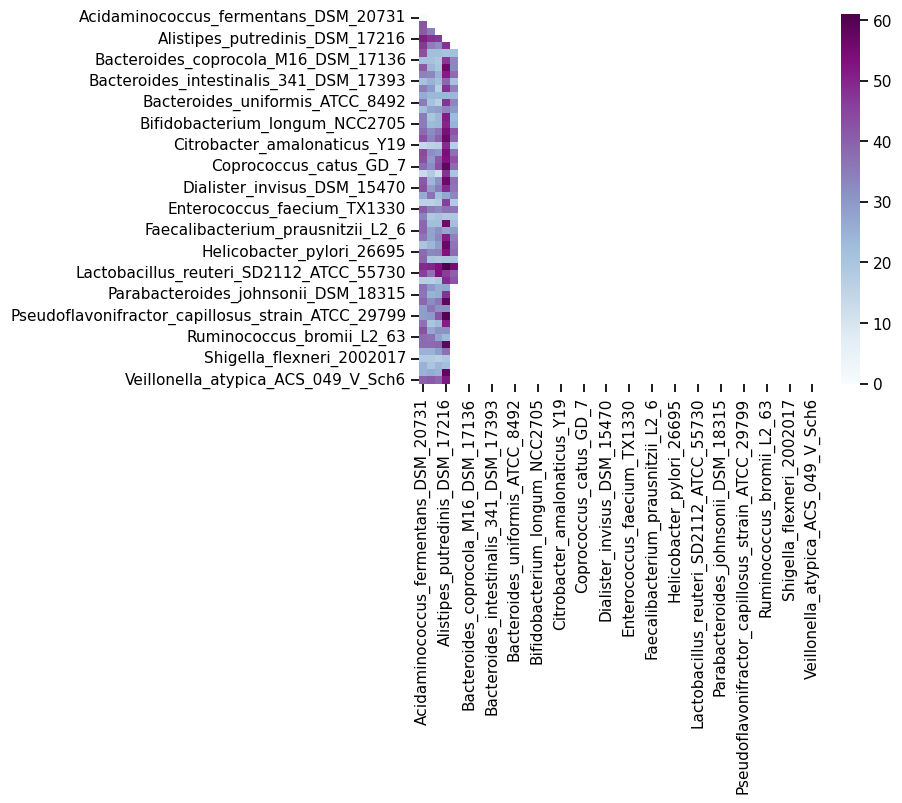

In [23]:
sns.heatmap(
    exchanges_pd, cmap="BuPu")